In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1]:
critics2 = {

    '레드벨벳': {'택시운전사': 2.5,'겨울왕국': 3.5,
             '리빙라스베가스': 3.0,'넘버3': 3.5,
             '사랑과전쟁': 2.5,'세계대전': 3.0},

    'BTS': {'택시운전사': 1.0,'겨울왕국': 4.5,
            '리빙라스베가스': 0.5,'넘버3': 1.5,
            '사랑과전쟁': 4.5,'세계대전': 5.0},

    '블랙핑크': {'택시운전사': 3.0,'겨울왕국': 3.5,
             '리빙라스베가스': 1.5,'넘버3': 5.0,
             '세계대전': 3.0,'사랑과전쟁': 3.5},

    '소녀시대': {'택시운전사': 2.5,'겨울왕국': 3.0,
             '넘버3': 3.5,'세계대전': 4.0},

    '마마무': {'겨울왕국': 3.5,'리빙라스베가스': 3.0,
            '세계대전': 4.5,'넘버3': 4.0,
            '사랑과전쟁': 2.5},

    '오마이걸': {'택시운전사': 3.0,'겨울왕국': 4.0,
             '리빙라스베가스': 2.0,'넘버3': 3.0,
             '세계대전': 3.5,'사랑과전쟁': 2.0},

    '모모랜드': {'택시운전사': 3.0,'겨울왕국': 4.0,
             '세계대전': 3.0,'넘버3': 5.0,
             '사랑과전쟁': 3.5},

    '우주소녀': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,
             '넘버3': 4.0}

}

In [4]:
# P,Q 점 거리

def simdist(data,name1,name2):
    ret=0
    for key in data[name1]:
        try:
            dist=data[name1][key]-data[name2][key]
        except KeyError:
            continue
        ret+=dist**2
    
    return 1/((ret**0.5)+1)

simdist(critics2,'소녀시대','블랙핑크')

0.3405424265831667

In [7]:
def topmatch(data,name,index=3):
    relation_list=[]
    for cur_name in data:
        if cur_name!=name:
            sim=simdist(data,name,cur_name)
            relation_list.append([cur_name,sim])
    relation_list.sort(key=lambda x:x[-1],reverse=True)
    return relation_list[:index]

topmatch(critics2,'소녀시대')

[['마마무', 0.5358983848622454],
 ['레드벨벳', 0.4721359549995794],
 ['오마이걸', 0.43050087404306037]]

In [9]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

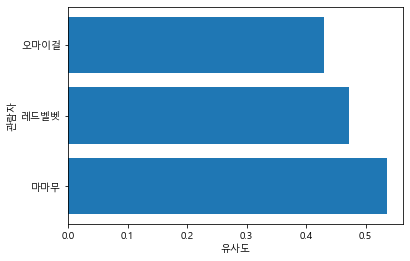

In [12]:
def mybarchart(data,name):
    pos = range(len(data))
    plt.barh(pos,data)
    plt.yticks(pos,name)
    plt.xlabel('유사도')
    plt.ylabel('관람자')
    plt.show()
    
res=topmatch(critics2,'소녀시대')
names,score = zip(*res)
mybarchart(score,names)

### __Std(x) = (1/N)*sigma(){(x-x_mean)^2}__  
  
### __Covariance(x,y) = (1/N)*sigma(){(x-x_mean)*(y-y_mean)}__  
  
### __Correlation(x,y) = Covariance(x,y) / (std_x * std_y)__  

* 유클리디안 한계점 : 절대적 기준에 의한 데이터가 아니거나 특이점에 대해 매우 취약

(0.0, 5.0, 0.0, 5.0)

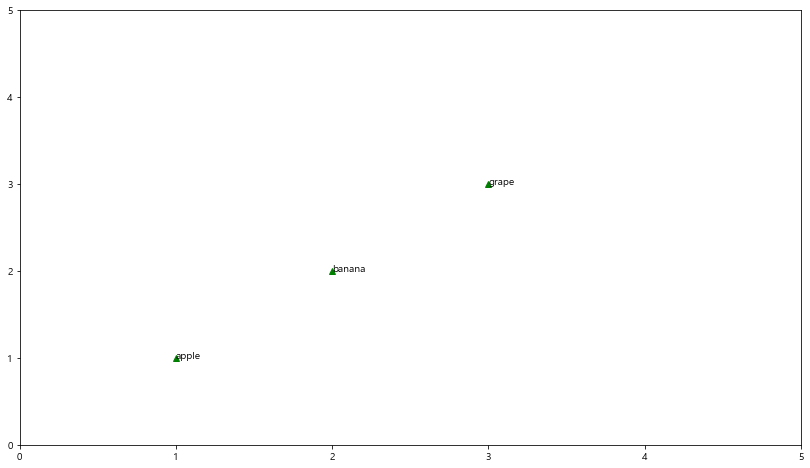

In [17]:
plt.figure(figsize=(14,8)) #72pixel 단위
plt.plot([1,2,3],[1,2,3],'g^')
plt.text(1,1,'apple')
plt.text(2,2,'banana')
plt.text(3,3,'grape')
plt.axis([0,5,0,5])

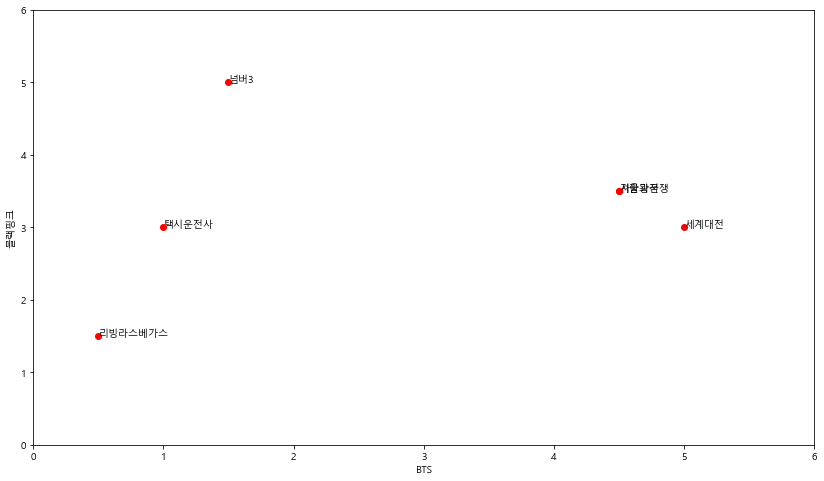

In [24]:
def draw_graph(data,name1,name2):
    
    # X축 : BTS가 부여한 영화 평점
    # Y축 : 트와이스가 부여한 영화 평점
    # if 택시 운전사 : BTS(4점) , 트와이스(3)  => (4,3) 위치에 표기
    plt.figure(figsize=(14,8))
    plt.axis([0,6,0,6])
    plt.xlabel(name1)
    plt.ylabel(name2)
    xcord,ycord=[],[]
    for key in data[name1]:
        if key in data[name2]:
            xcord.append(data[name1][key])
            ycord.append(data[name2][key])
            plt.text(data[name1][key],data[name2][key],key)
    plt.plot(xcord,ycord,'ro')
    return

draw_graph(critics2,'BTS','블랙핑크')

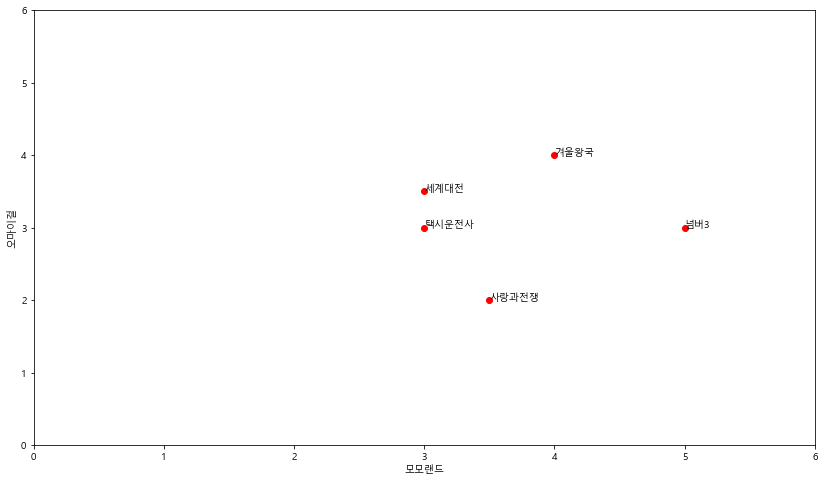

In [25]:
draw_graph(critics2,'모모랜드','오마이걸')

In [26]:
# BTS 기준 피어슨 상관계수 구하기

topmatch(critics2,'BTS',5)

[['소녀시대', 0.2449655295864104],
 ['오마이걸', 0.19404996501286384],
 ['마마무', 0.1918253663634734],
 ['우주소녀', 0.1886378647726465],
 ['레드벨벳', 0.1774053291584318]]

In [33]:
def simPearson(data,name1,name2):
    sumX,sumY=0,0
    sumPowX,sumPowY=0,0
    sumXY=0
    count=0
    
    for key in data[name1]:
        if key in data[name2]:
            count+=1
            sumX+=data[name1][key]
            sumPowX+=(data[name1][key])**2
            sumY+=data[name2][key]
            sumPowY+=(data[name2][key])**2
            sumXY+=data[name1][key]*data[name2][key]
    ret= (sumXY-((sumX*sumY)/count))/((sumPowX-((sumX**2)/count))*(sumPowY-((sumY**2)/count)))**0.5
    return ret

print(simPearson(critics2,'BTS','소녀시대'))

0.5692099788303083
